In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline
import numpy as np


In [24]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'axes.prop_cycle': cycler('color', ['#BA4D49','#4D6168','#F06560','#83A8AE','#E6B0A4','#C9CFAD']),
    'axes.spines.left'   : True,   
    'axes.spines.bottom' : False,
    'axes.spines.top'    : False,
    'axes.spines.right'  : False,
    'axes.labelcolor'  :'#4D6168',
    'axes.grid'           : True,
    'axes.axisbelow'      : True,
    
    'font.sans-serif': 'Arial Rounded MT Bold',
    'font.family': 'sans-serif',
    
    'text.color': '#4D6168',
    
    'xtick.color' : '#4D6168',
    'ytick.color' : '#4D6168',
    
    'grid.color':  '#83A8AE',
    
    'legend.edgecolor': 'white',
 
})

In [71]:
df = pd.ExcelFile("NationalOutbreakPublicDataTool.xlsx").parse()

In [72]:
#Getting only cases with deaths
df = df[df['Deaths']>0]

In [73]:
df.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify
300,2009,7,Michigan,Food,Salmonella enterica,Newport,Confirmed,NaN,4,2.0,4.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354,2009,5,West Virginia,Food,Salmonella enterica,Enteritidis,Confirmed,NaN,21,9.0,21.0,2.0,21.0,"sausage, pork",NaN,Pork,NaN,NaN,NaN,NaN
594,2010,2,Illinois,Food,Shigella sonnei,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",314,13.0,314.0,1.0,314.0,"tomatoes; bread, nine grain",NaN,Multiple,NaN,NaN,NaN,NaN
792,2010,5,Louisiana,Food,Clostridium perfringens,NaN,Confirmed,NaN,54,3.0,54.0,3.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,2010,6,New York,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Other,3,1.0,3.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#Creating a new column to categorize foods in 3 categories

def get_category(x):
    if x == 'Beef':
        val = 'Animal Products'
    elif x == 'Chicken':
        val = 'Animal Products'
    elif x == 'Dairy':
        val = 'Animal Products'
    elif x == 'Eggs':
        val = 'Animal Products'
    elif x == 'Fish':
        val = 'Animal Products'
    elif x == 'Game':
        val = 'Animal Products'
    elif x == 'Mollusks':
        val = 'Animal Products'
    elif x == 'Pork':
        val = 'Animal Products'
    elif x == 'Turkey':
        val = 'Animal Products'
    elif x == 'Fruits':
        val = 'Plant-based Products'
    elif x == 'Fungi':
        val = 'Plant-based Products'
    elif x == 'Nuts-Seeds':
        val = 'Plant-based Products'
    elif x == 'Root/Underground':
        val = 'Plant-based Products'
    elif x == 'Seeded Vegetables':
        val = 'Plant-based Products'
    elif x == 'Sprouts':
        val = 'Plant-based Products'
    elif x == 'Vegetable Row Crops':
        val = 'Plant-based Products'
    else:
        val = 'Unknown or Multiple Sources'
    return val

In [84]:
#Creating a new column to categorize foods in 3 categories

df['Category'] = df['IFSAC Category'].apply(get_category)


In [85]:
df.head(50)

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Category
300,2009,7,Michigan,Food,Salmonella enterica,Newport,Confirmed,NaN,4,2.0,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown or Multiple Sources
354,2009,5,West Virginia,Food,Salmonella enterica,Enteritidis,Confirmed,NaN,21,9.0,...,2.0,21.0,"sausage, pork",NaN,Pork,NaN,NaN,NaN,NaN,Animal Products
594,2010,2,Illinois,Food,Shigella sonnei,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",314,13.0,...,1.0,314.0,"tomatoes; bread, nine grain",NaN,Multiple,NaN,NaN,NaN,NaN,Unknown or Multiple Sources
792,2010,5,Louisiana,Food,Clostridium perfringens,NaN,Confirmed,NaN,54,3.0,...,3.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown or Multiple Sources
907,2010,6,New York,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Other,3,1.0,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown or Multiple Sources
1302,2010,10,Colorado,Food,Norovirus unknown,NaN,Confirmed,Long-term care/nursing home/assisted living fa...,21,4.0,...,1.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown or Multiple Sources
1478,2011,3,Rhode Island,Food,Salmonella enterica,Heidelberg,Confirmed,NaN,81,29.0,...,2.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown or Multiple Sources
1484,2009,2,Multistate,Food,Salmonella enterica,Carrau,Confirmed,Grocery store,53,4.0,...,1.0,NaN,melon,NaN,Fruits,NaN,NaN,NaN,NaN,Plant-based Products
1487,2009,8,Multistate,Food,"Escherichia coli, Shiga toxin-producing",O157:H7,Confirmed,Other,32,19.0,...,2.0,NaN,"ground beef, other",NaN,Beef,NaN,NaN,NaN,NaN,Animal Products
1575,2010,1,Texas,Food,Listeria monocytogenes,NaN,Confirmed,NaN,10,10.0,...,5.0,10.0,"celery, unspecified",NaN,Vegetable Row Crops,NaN,NaN,NaN,NaN,Plant-based Products


In [86]:
#Another way of creating a new column to categorize foods in 3 categories
#df['Category'] = ['animal' if x == ('Pork') else 'Other' for x in df['IFSAC Category']]


In [87]:
#Yet another way of creating a new column to categorize foods in 3 categories
#df['newcolumn'] = np.where(df['IFSAC Category'] == 'Pork', 'Animal', 'Other')
#df['newcolumn'] = np.where(df['IFSAC Category'] == 'Beef', 'Meat', 'Other')
#df['newcolumn'] = np.where(df['IFSAC Category'] == ('Turkey'), 'Meat', 'Other')


In [88]:
df_3cat = df.groupby('Category').Deaths.sum()
df_3cat = df_3cat.to_frame(name='Deaths').sort_values('Deaths', ascending=True)
df_3cat.reset_index()

,Category,Deaths
0,Animal Products,84.0
1,Plant-based Products,106.0
2,Unknown or Multiple Sources,175.0


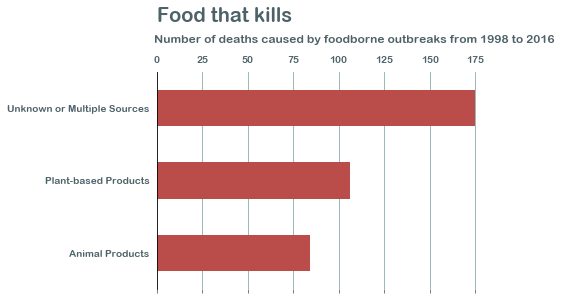

In [90]:
ax = df_3cat.plot(kind = 'barh')
ax.set_title("Food that kills", pad=50, fontsize=20, loc='left')

ax.yaxis.label.set_visible(False)
ax.grid(False, axis='y')
ax.tick_params(labeltop=True, labelbottom=False)
ax.tick_params(left=False)
plt.gcf().text(0.12, 0.98, "Number of deaths caused by foodborne outbreaks from 1998 to 2016", ha='left', fontsize=12)
ax.legend_.remove()

In [91]:
df.Deaths.sum()

365.0

In [102]:
#data copypasted from https://www-fars.nhtsa.dot.gov/Main/index.aspx
death_total_car = (25096+23897+22307+22483+23017+22510+23371+24526+26791+30527+32119+33070+33276+33627+34105+33243+33451+33392+33088)
years=19
cardeath_per_year=death_total_car/years
print("Car:", cardeath_per_year)
death_total_food=df.Deaths.sum() #see above
fooddeath_per_year=death_total_food/years
print("Food:", fooddeath_per_year)

Car: 28626.105263157893
Food: 19.210526315789473


In [113]:
d = {'cause': ['By Car Accidents' , 'By Foodborne Outbreaks'], 'Deaths': [28626, 19]}
df_car_food = pd.DataFrame(data=d)

In [114]:
df_car_food

,cause,Deaths
0,By Car Accidents,28626
1,By Foodborne Outbreaks,19


In [115]:
df_alldeaths = df_car_food.groupby('cause').Deaths.sum()

Text(0.12,0.98,'Number of people killed every year')

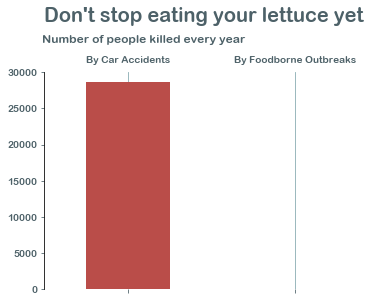

In [119]:
ax2 = df_alldeaths.plot(kind = 'bar')
ax2.set_title("Don't stop eating your lettuce yet", pad=50, fontsize=20, loc='left')

ax2.yaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
ax2.grid(False, axis='y')
ax2.tick_params(labeltop=True, labelbottom=False)
ax2.tick_params(left=True)
plt.gcf().text(0.12, 0.98, "Number of people killed every year", ha='left', fontsize=12)
